<a href="https://colab.research.google.com/github/g-e-mm/KNN_Market_Positioning/blob/main/Market_Positioning_of_Mobile_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

07 03 2024
 <center>KNN PROJECT</center>
 <center>**Market Positioning of Mobile**</center>

# <center>Introduction</center>

**Abstract:** <br>
There is a new mobile company and the CEO wants to give a tough fight to big
companies like Apple, Samsung etc. He has no idea of how to estimate the price of
mobiles his company creates. A simple assumption of the prices will not be profitable in
this competitive world. To solve this problem he collects sales data of mobile phones of
various companies. Thus, the CEO has hired you to find out some relation between
features of a mobile phone(eg:- RAM, Internal Memory etc) and its selling price


**Problem Statement**
<br> Predict a price range, indicating how high the price is, using K-Nearest Neighbors
algorithm.

**Steps**<br>●Load data training and testing data <br>●Choose the value of K i.e. the nearest data points. K can be any integer.<br> ●For each point in the test data do the following −  <br>○Calculate the distance between test data and each row of training data using Euclidean distance formula  <br>○Now, based on the distance value, sort them in ascending order. <br>○Choose the top K rows from the sorted array.   <br>○Now, it will assign a class to the test point based on most frequent class of these rows <br>●Show conclusion of the algorithm

# Loading Data & Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
train = pd.read_csv('/content/Mobile_data.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


there are no missing values here. However an KNN Imputer can be used for "imputing" missing values.<br> *sklearn.impute.KNNImputer*

In [ ]:
train.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


# EDA

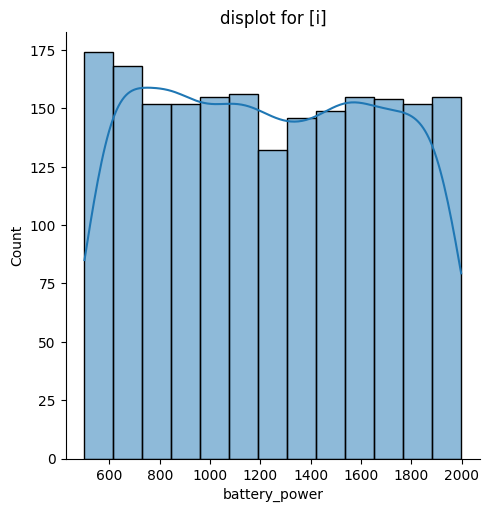

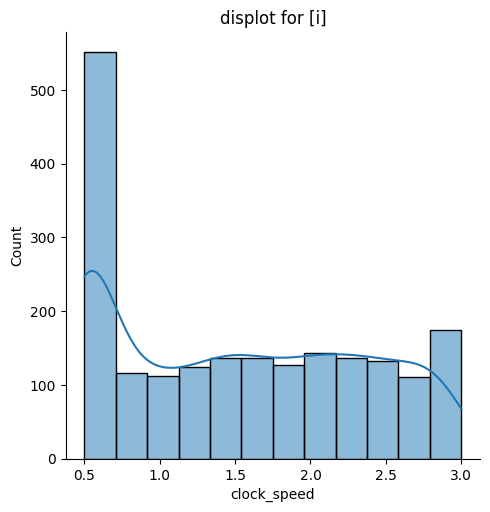

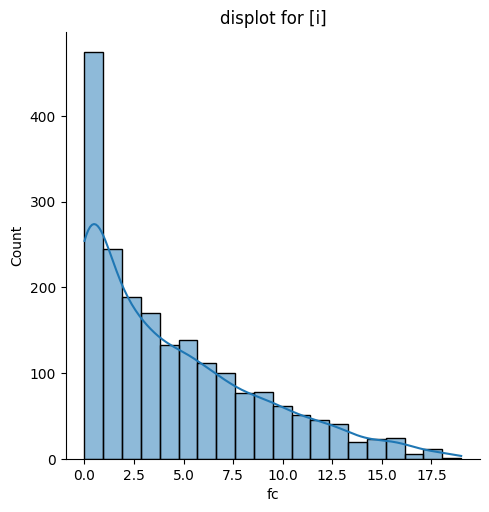

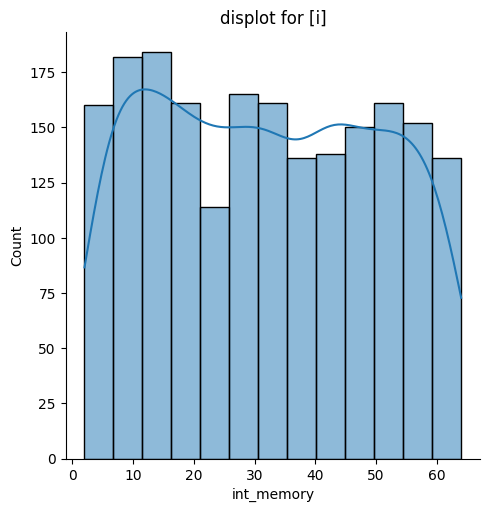

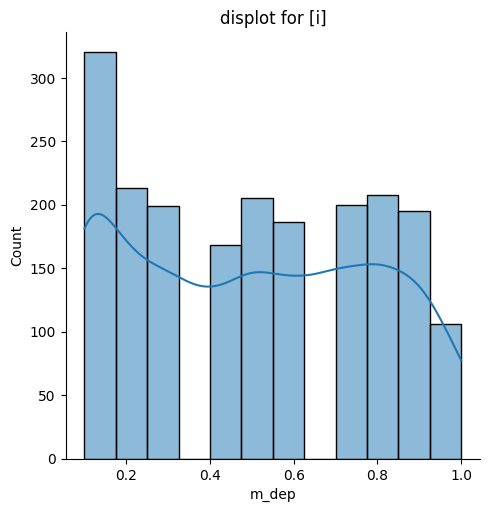

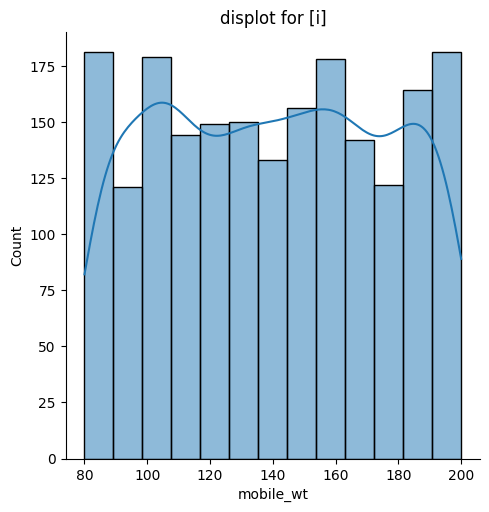

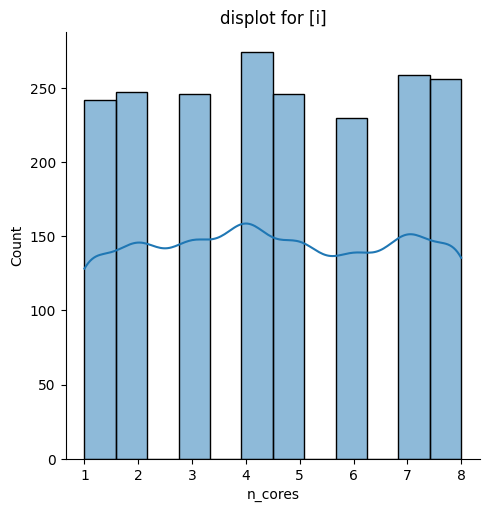

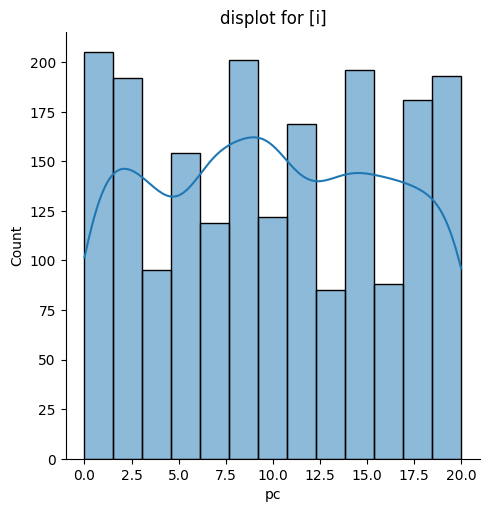

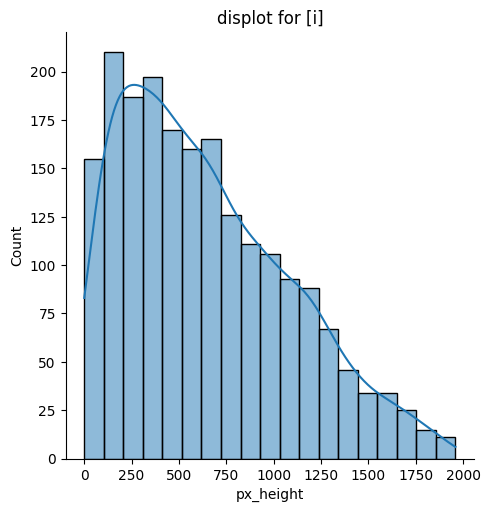

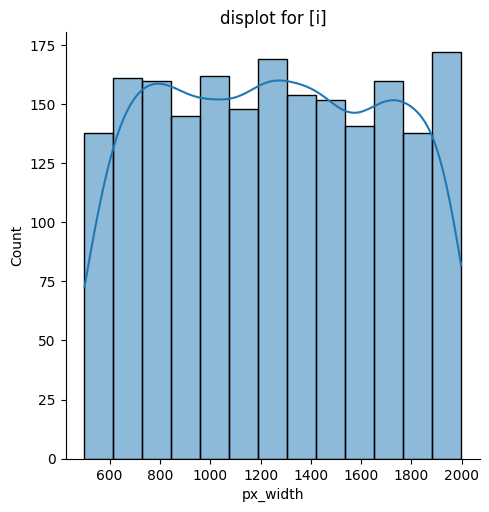

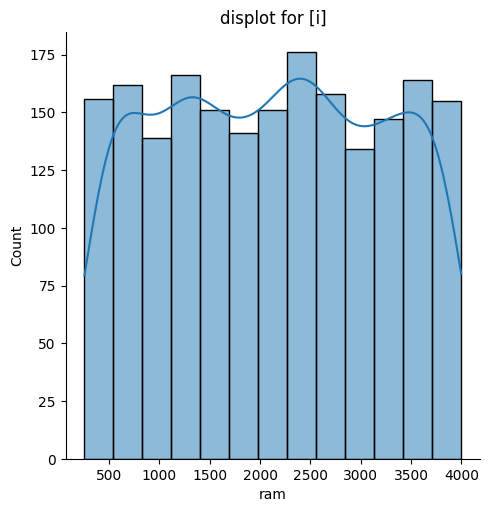

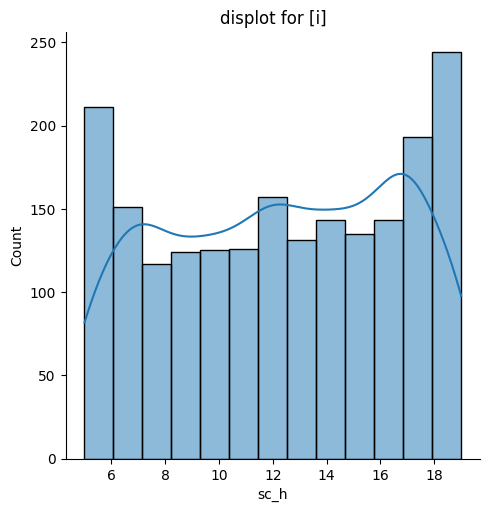

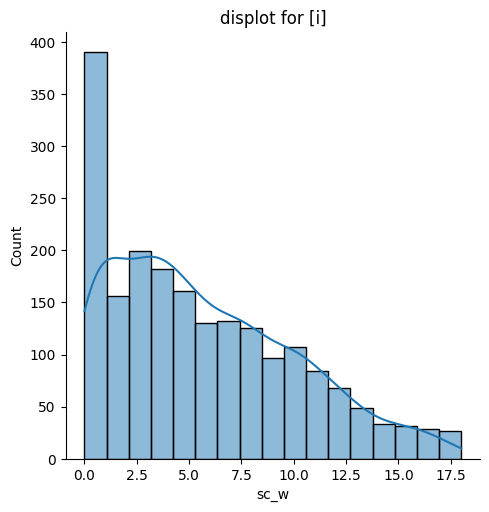

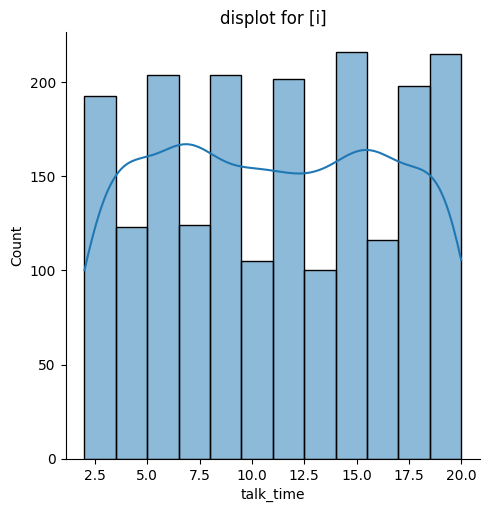

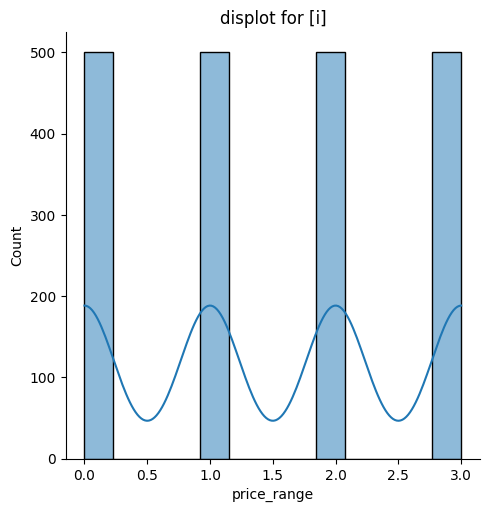

In [ ]:
for i in train:
  sns.displot(train[i], kde=True)
  plt.title(f"displot for [i]")

In [ ]:
train.skew()

battery_power    0.031898
clock_speed      0.178084
fc               1.019811
int_memory       0.057889
m_dep            0.089082
mobile_wt        0.006558
n_cores          0.003628
pc               0.017306
px_height        0.666271
px_width         0.014787
ram              0.006628
sc_h            -0.098884
sc_w             0.633787
talk_time        0.009512
price_range      0.000000
dtype: float64

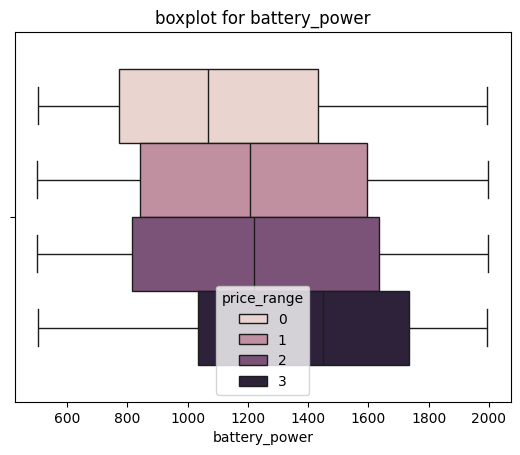

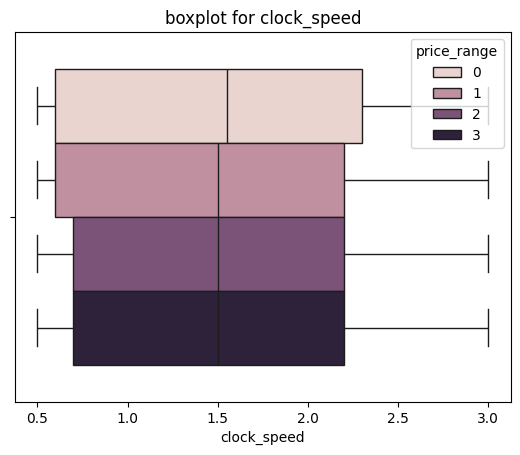

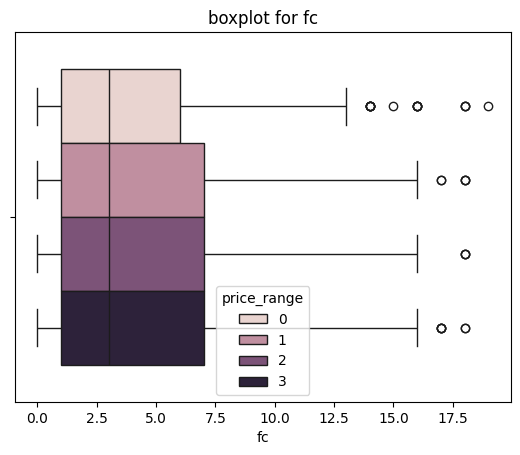

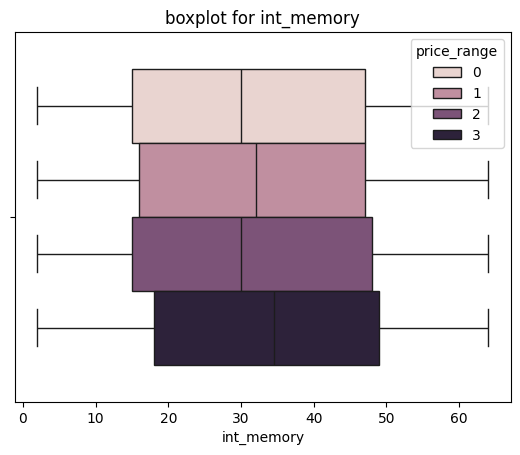

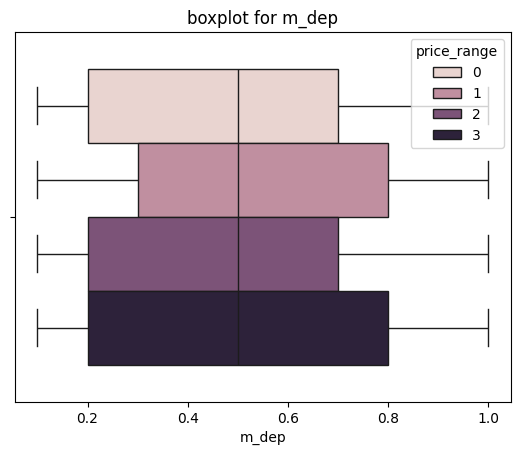

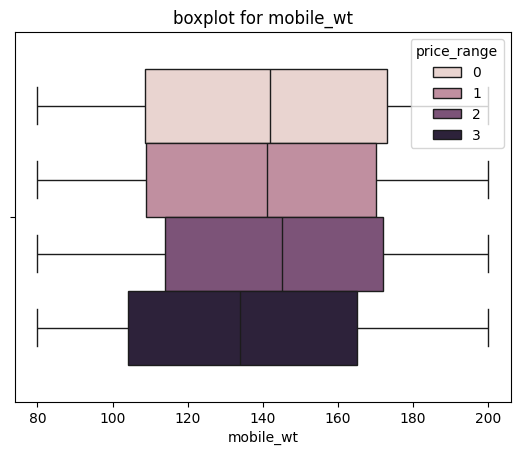

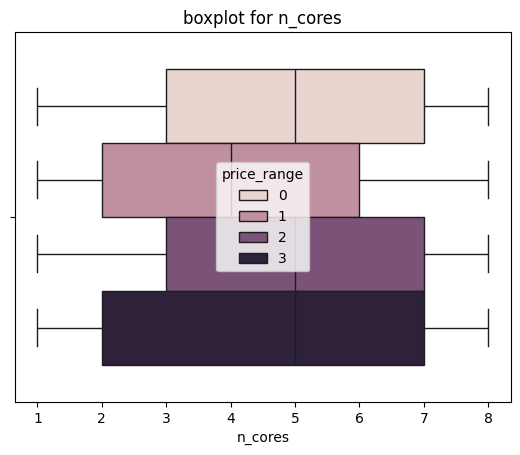

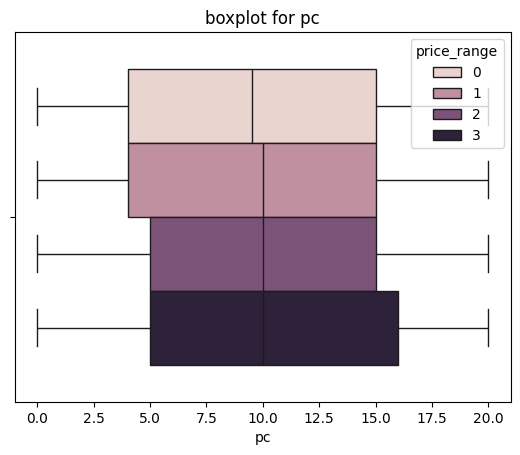

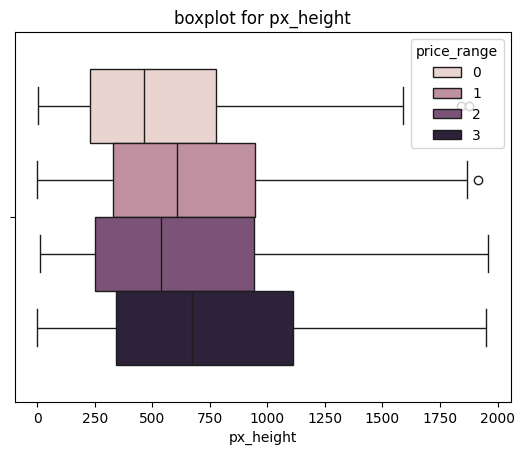

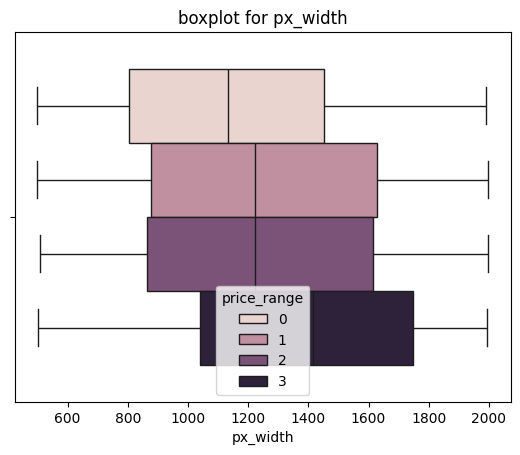

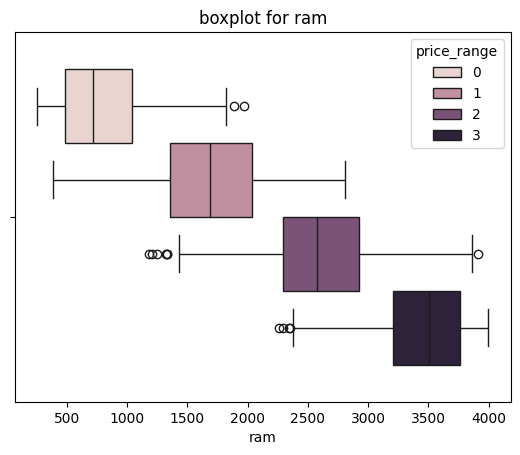

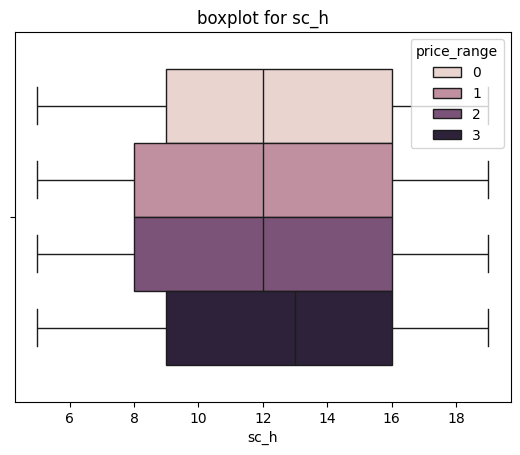

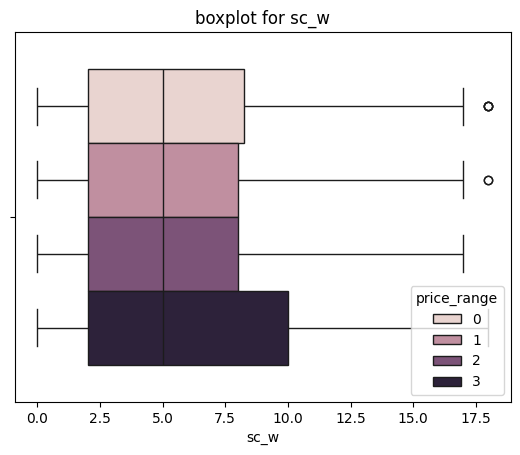

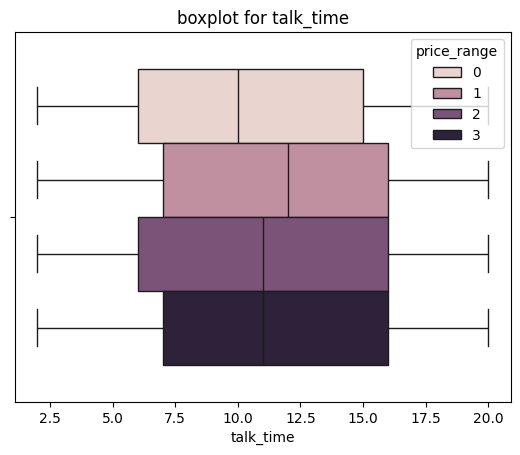

In [ ]:
for i in train.columns:
  if i!='price_range':
    sns.boxplot(x = train[i], hue = train['price_range'])
    plt.title(f"boxplot for {i}")
    plt.show()

**Observation from the Boxplots:**<br>In the boxplot for fc, we observe an outlier behaviour with lower quality fc(front camera) in an expensive phone.
this is one of the causes of non linearity in the dataset
<br>
<br>similarly we find the same thing happening with the RAM boxplot - another contribution for the non linearity

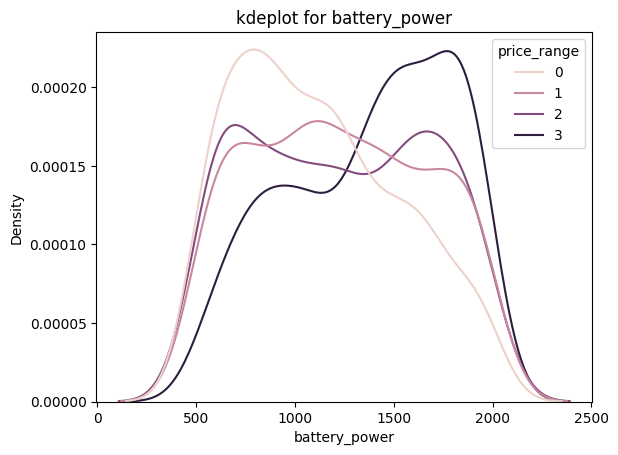

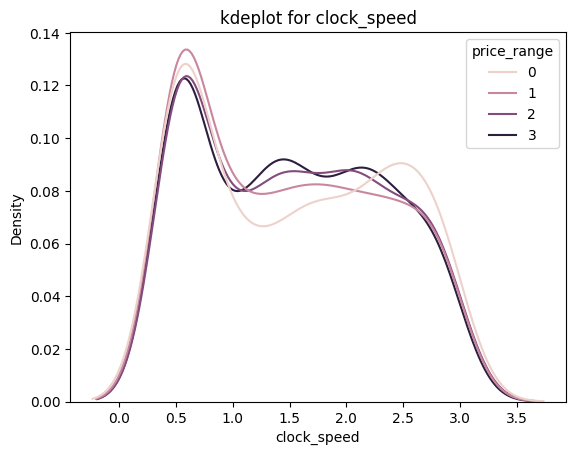

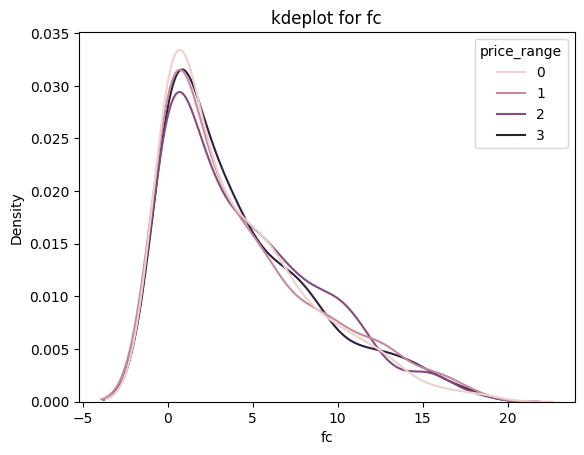

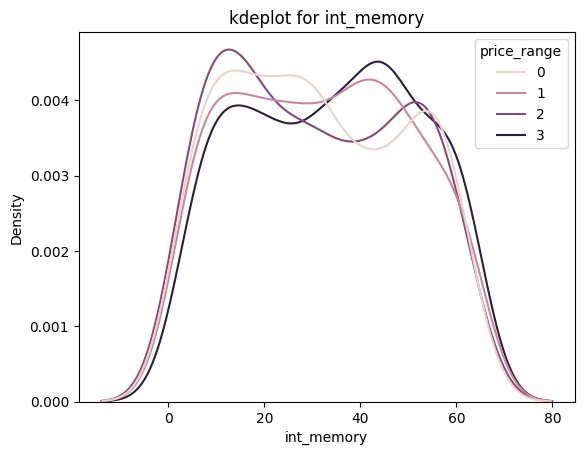

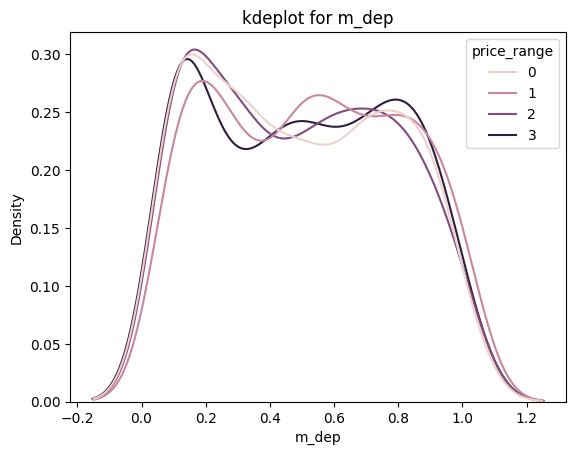

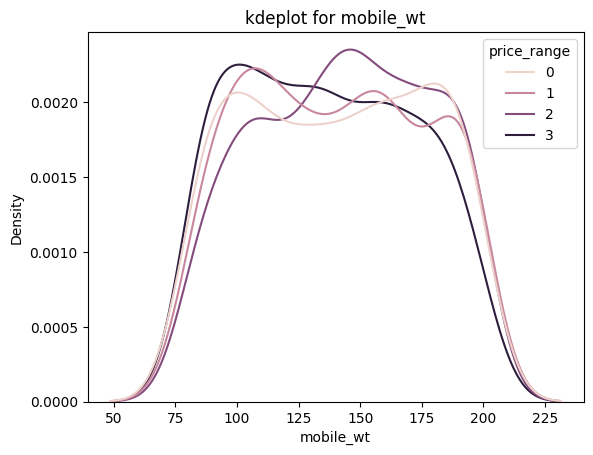

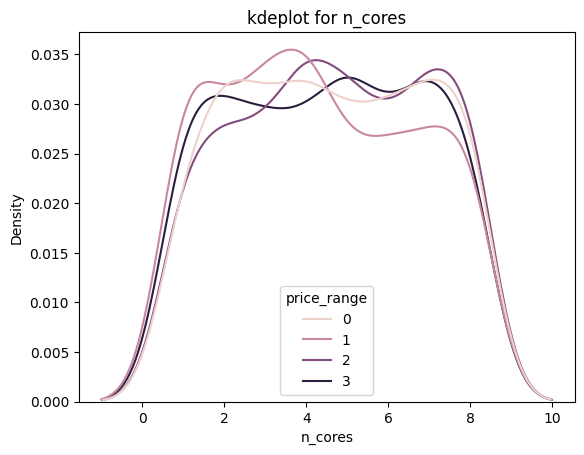

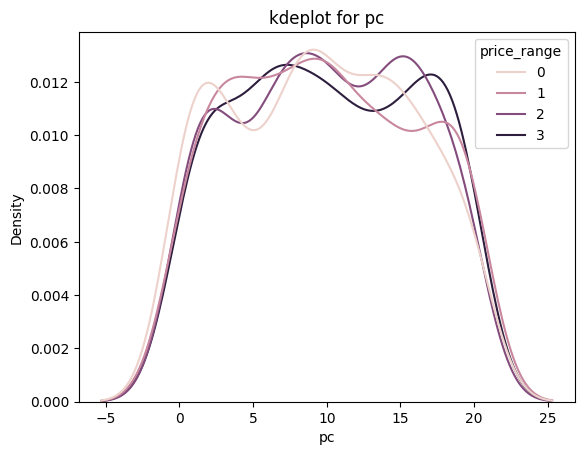

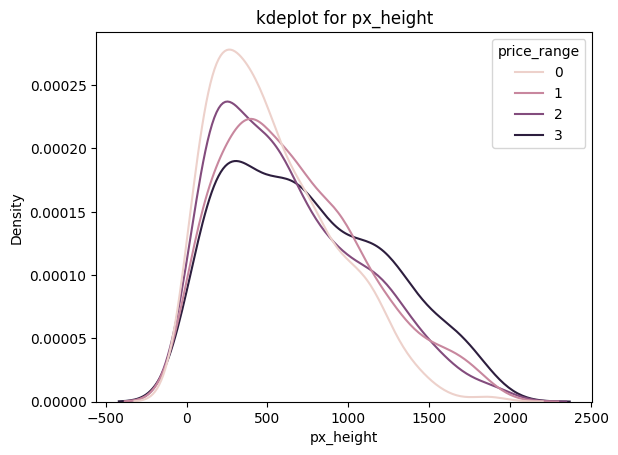

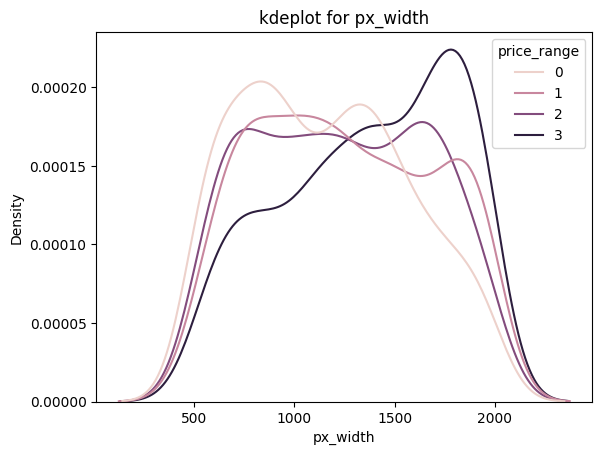

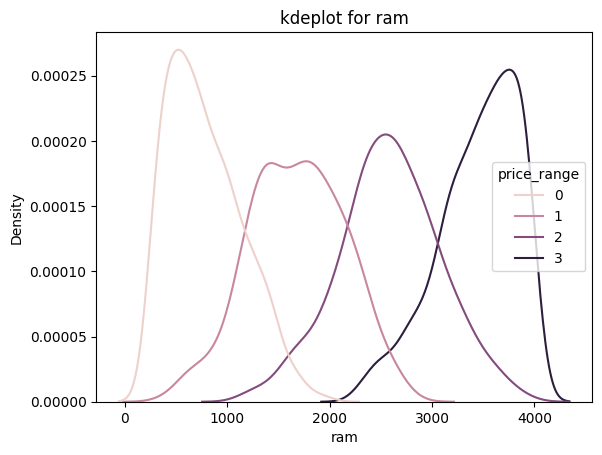

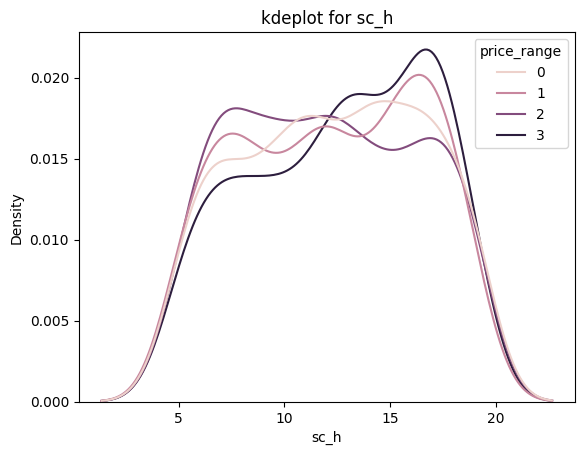

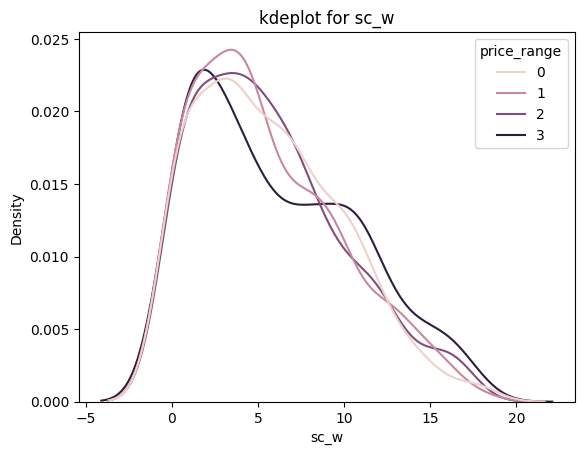

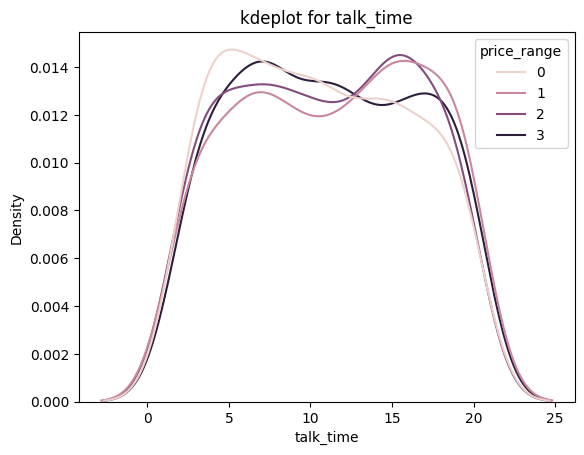

In [ ]:
for i in train.columns:
  if i!='price_range':
    sns.kdeplot(x = train[i], hue = train['price_range'])
    plt.title(f"kdeplot for {i}")
    plt.show()

**Observations from the kde Plots**
We don't find a lot of difference in most of the features, except the width defined by pc_width. <br><br> RAM is a feature where the behaviour is as expected. It has distinguishable overlaps!

# Bivariate Analysis

<Axes: >

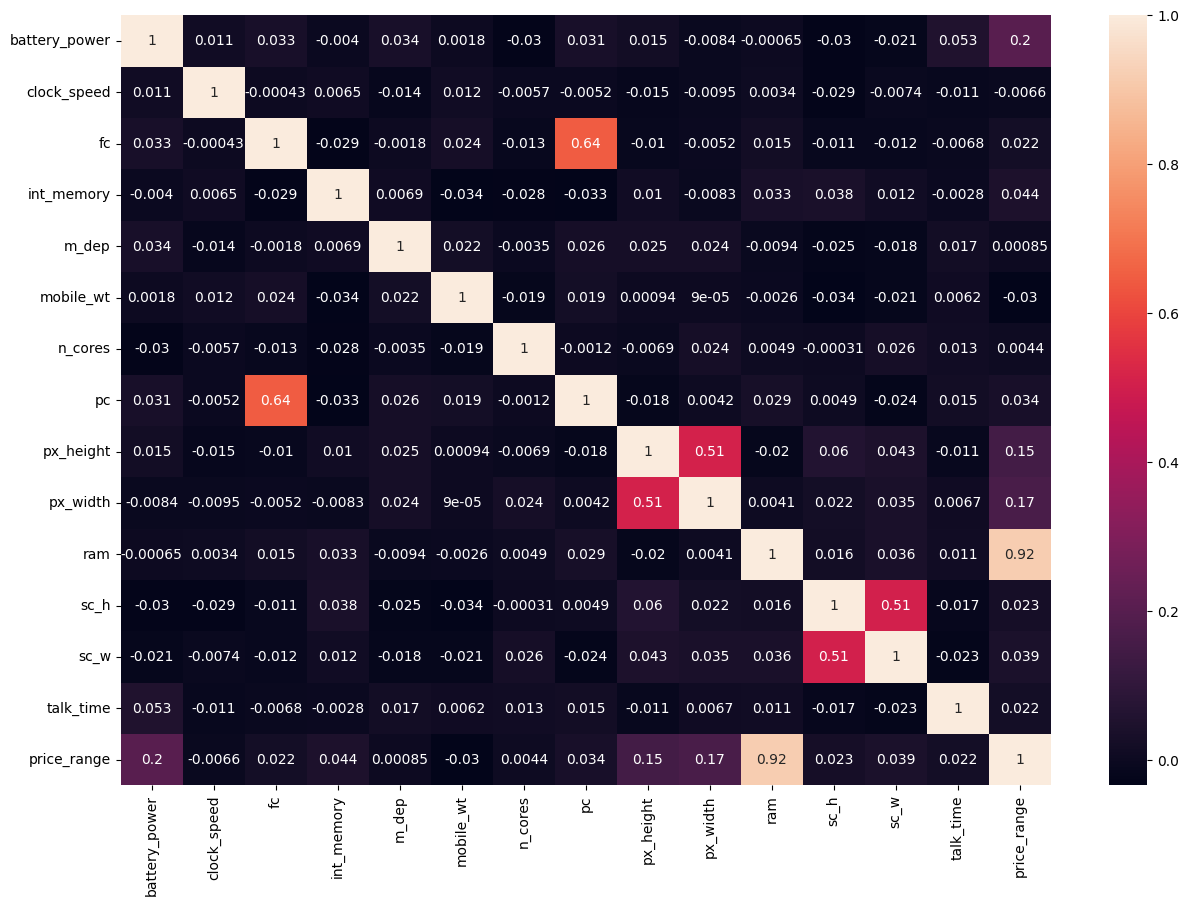

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot = True)

**Observations from the Heatmap**<br> There is a correlation between pc and fc but it is not very significant. <br> There is a correlation between width and height, which is logical, however it is not a significant number once again.<br> Now, we find multicollinearity here.

# Data Preparation

splitting data into x and y then further spliting as train and test data

In [ ]:
x = train.drop(['price_range'], axis=1)
y = train['price_range']
x.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 14)
(400, 14)
(1600,)
(400,)


# Multi-Variate Model

## Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
y_hat_train_lr = lr.predict(x_train)
y_hat_test_lr = lr.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  acc_score = accuracy_score(actual, predicted)
  clas_rep = classification_report(actual, predicted)
  print('The Accuracy of the model is: ', round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)
#running the model
model_eval(y_train, y_hat_train_lr)

The Accuracy of the model is:  0.71
[[349  63   1   0]
 [ 48 261  83   8]
 [  1  82 205  96]
 [  0   3  72 328]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       413
           1       0.64      0.65      0.65       400
           2       0.57      0.53      0.55       384
           3       0.76      0.81      0.79       403

    accuracy                           0.71      1600
   macro avg       0.71      0.71      0.71      1600
weighted avg       0.71      0.71      0.71      1600



## Decision Tree Model

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_hat_train_dtree = dtree.predict(x_train)
y_hat_test_dtree = dtree.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_dtree)

The Accuracy of the model is:  1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test, y_hat_test_dtree)

The Accuracy of the model is:  0.83
[[82  5  0  0]
 [ 9 79 12  0]
 [ 0 16 86 14]
 [ 0  0 12 85]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        87
           1       0.79      0.79      0.79       100
           2       0.78      0.74      0.76       116
           3       0.86      0.88      0.87        97

    accuracy                           0.83       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.83      0.83      0.83       400



In [ ]:
pd.DataFrame({'col_name': dtree.feature_importances_}, index=x.columns).sort_values(by='col_name', ascending=False)

,col_name
ram,0.635192
battery_power,0.118719
px_width,0.095803
px_height,0.084396
mobile_wt,0.014573
pc,0.009771
talk_time,0.008007
n_cores,0.007956
int_memory,0.007243
sc_h,0.006146


* We now see that RAM and Battery Power are significant. Thus more far way the kdeplots are from each other for each category, the more significant the elements get.
* We also observed the height and width showing slight significance. But this is rather overfitting





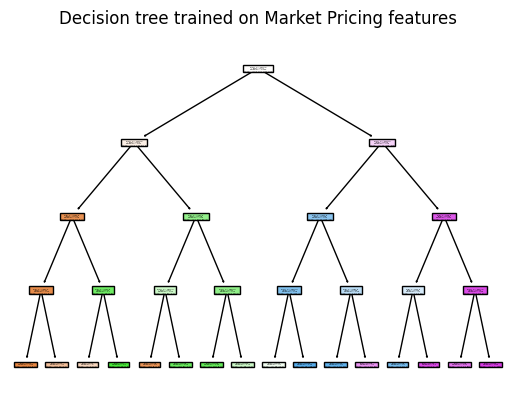

In [ ]:
plt.figure()
clf = DecisionTreeClassifier(max_depth=4).fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on Market Pricing features")
plt.show()

## Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_rf)

The Accuracy of the model is:  1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test, y_hat_test_rf)

The Accuracy of the model is:  0.9
[[86  1  0  0]
 [ 8 87  5  0]
 [ 0 13 95  8]
 [ 0  0  6 91]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.86      0.87      0.87       100
           2       0.90      0.82      0.86       116
           3       0.92      0.94      0.93        97

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
importances = rf.feature_importances_
importances_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
importances_df = importances_df.sort_values('importance', ascending=False)
importances_df

,feature,importance
10,ram,0.499301
0,battery_power,0.079095
9,px_width,0.060286
8,px_height,0.060087
5,mobile_wt,0.042033
3,int_memory,0.038794
13,talk_time,0.031243
7,pc,0.029750
1,clock_speed,0.029061
12,sc_w,0.028208


* Random Forest Classifier had an accuracy of 1.0 on the training set and 0.89 on the test set and seemingly a good fit

## Ada-Boost

In [ ]:
ada = AdaBoostClassifier(n_estimators = 100)
ada.fit(x_train, y_train)
y_train_ada = ada.predict(x_train)
y_hat_test_ada = ada.predict(x_test)

In [ ]:
model_eval(y_train, y_train_ada)

The Accuracy of the model is:  0.83
[[392  21   0   0]
 [ 67 286  47   0]
 [  0  41 301  42]
 [  0   0  56 347]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       413
           1       0.82      0.71      0.76       400
           2       0.75      0.78      0.76       384
           3       0.89      0.86      0.88       403

    accuracy                           0.83      1600
   macro avg       0.83      0.83      0.83      1600
weighted avg       0.83      0.83      0.83      1600



In [ ]:
model_eval(y_test, y_hat_test_ada)

The Accuracy of the model is:  0.83
[[83  4  0  0]
 [18 70 12  0]
 [ 0 12 92 12]
 [ 0  0 11 86]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88        87
           1       0.81      0.70      0.75       100
           2       0.80      0.79      0.80       116
           3       0.88      0.89      0.88        97

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400




* Ada Boost also performed well but with slightly lower accuracy. Therefore, XGBoost appears to be the preferred choice for this classification task.

## Gradient Boost

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 150)
gb.fit(x_train, y_train)
y_hat_train_gb = gb.predict(x_train)
y_hat_test_gb = gb.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_gb)

The Accuracy of the model is:  1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test, y_hat_test_gb)

The Accuracy of the model is:  0.92
[[ 85   2   0   0]
 [  5  91   4   0]
 [  0   7 100   9]
 [  0   0   7  90]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.91      0.91      0.91       100
           2       0.90      0.86      0.88       116
           3       0.91      0.93      0.92        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.91      0.92      0.91       400



## Extreme Gradient Booster

In [ ]:
xgb = XGBClassifier(n_estimators = 200)

In [ ]:
xgb.fit(x_train, y_train)
y_hat_train_xgb = xgb.predict(x_train)
y_hat_test_xgb = xgb.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_xgb)

The Accuracy of the model is:  1.0
[[413   0   0   0]
 [  0 400   0   0]
 [  0   0 384   0]
 [  0   0   0 403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       413
           1       1.00      1.00      1.00       400
           2       1.00      1.00      1.00       384
           3       1.00      1.00      1.00       403

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [ ]:
model_eval(y_test, y_hat_test_xgb)

The Accuracy of the model is:  0.92
[[ 85   2   0   0]
 [  5  91   4   0]
 [  0   8 100   8]
 [  0   0   6  91]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        87
           1       0.90      0.91      0.91       100
           2       0.91      0.86      0.88       116
           3       0.92      0.94      0.93        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



* XGBoost demonstrated superior performance with an accuracy of 1.0 on the training set and 0.92 on the test set, outperforming Ada Boost and other models. Its high precision, recall, and F1-scores across all classes indicate effective classification.

## K Nearest Neighbour

In [ ]:
np.sqrt(len(x_train))

40.0

In [ ]:
knn = KNeighborsClassifier(n_neighbors=41)
knn.fit(x_train, y_train)
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)

In [ ]:
model_eval(y_train, y_hat_train_knn)

The Accuracy of the model is:  0.93
[[405   8   0   0]
 [ 16 370  14   0]
 [  0  28 335  21]
 [  0   0  18 385]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       413
           1       0.91      0.93      0.92       400
           2       0.91      0.87      0.89       384
           3       0.95      0.96      0.95       403

    accuracy                           0.93      1600
   macro avg       0.93      0.93      0.93      1600
weighted avg       0.93      0.93      0.93      1600



In [ ]:
model_eval(y_test, y_hat_test_knn)

The Accuracy of the model is:  0.92
[[ 86   1   0   0]
 [  8  89   3   0]
 [  0   8 101   7]
 [  0   0   6  91]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        87
           1       0.91      0.89      0.90       100
           2       0.92      0.87      0.89       116
           3       0.93      0.94      0.93        97

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



Trying with multiple K values

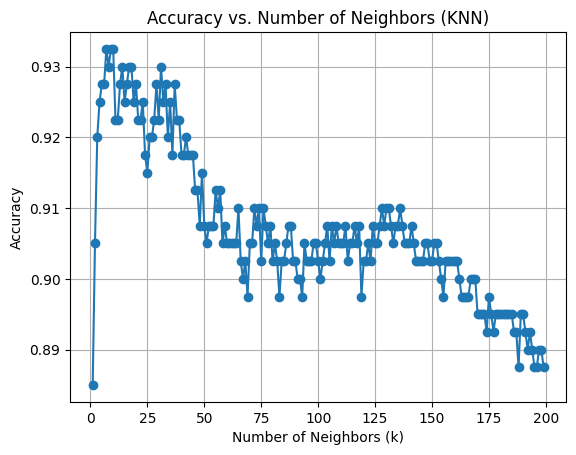

In [ ]:
k_values = range(1, 200)  # Vary k from 1 to 200
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Neighbors (KNN)")
plt.grid(True)
plt.show()

In [ ]:
x_train.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

In [ ]:
#!pip install streamlit

In [ ]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
# Streamlit app
st.title("Mobile Price Prediction App")
st.sidebar.header("User Input Features")

In [ ]:
x_train.columns

In [ ]:
# Collect user input
battery_power = st.sidebar.slider("Battery Power", min_value=500, max_value=2000, value=1000)
clock_speed = st.sidebar.slider("Clock Speed", min_value=0.5, max_value=3.0, value=1.0)
fc = st.sidebar.slider("fc", min_value=0, max_value=19.0, value=1.0)
int_memory = st.sidebar.slider("int_memory", min_value=2, max_value=64, value=1.0)
m_dep = st.sidebar.slider("m_dep", min_value=0, max_value=1, value=1.0)
mobile_wt = st.sidebar.slider("mobile_wt", min_value=80, max_value=200, value=1.0)
n_cores = st.sidebar.slider("n_cores", min_value=1, max_value=8, value=1.0)
pc = st.sidebar.slider("pc", min_value=0, max_value=20, value=1.0)
px_height = st.sidebar.slider("px_height", min_value=0, max_value=1960, value=1.0)
px_width = st.sidebar.slider("px_width", min_value=500, max_value=2000, value=1.0)
ram = st.sidebar.slider("ram", min_value=256, max_value=4000, value=1.0)
sc_h = st.sidebar.slider("ram", min_value=5, max_value=20, value=1.0)
sc_w = st.sidebar.slider("sc_w", min_value=0, max_value=20, value=1.0)
talk_time = st.sidebar.slider("talk_time", min_value=2, max_value=20, value=1.0)


In [ ]:
train.describe